# Import Lib and Read DATA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk import download, word_tokenize
import re
from wordcloud import WordCloud
import warnings
%matplotlib inline

pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yvelazquez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yvelazquez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [4]:
df.shape

(22524, 6)

In [5]:
df.head(5)

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadBears_ \n@lkinc_algo \n@al_goanna \n\n#WorldCup2022 https://t.co/Oga3TzvG5h,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch video. Shows how much the face of Canada and our men’s national team have changed since our last World Cup entry in 1986. Can’t wait to see these boys in action!\n\nThis is Canada: FIFA World Cup Opening Video https://t.co/7g73vvwtg8,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 https://t.co/1SQrNa2dYU,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/4AyZbzGTX4\n#JeonJungkook #Jungkook #전정국 #정국 #JK #GoldenMaknae #bunny #Kookie #Jungshook #BTS #방탄소년단 #WorldCup2022 #FIFAKOOK \n@BTS_twt,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? Why are they saying these during the opening ceremony?? Why did the BBC censor the #WorldCup2022 opening ceremony?? https://t.co/f72P03ZN2k",negative


# Cleaning Dataset

In [6]:
df = df.iloc[:, 1:]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22524 non-null  object
 1   Number of Likes  22524 non-null  int64 
 2   Source of Tweet  22524 non-null  object
 3   Tweet            22524 non-null  object
 4   Sentiment        22524 non-null  object
dtypes: int64(1), object(4)
memory usage: 880.0+ KB


## Functions

In [8]:
### Clean Tweet
def clean(tweet):
    tweet = tweet.split(' ')
    tweet = ' '.join(tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+' , '' , tweet)
    tweet = re.sub('\n' , '' , tweet)
    tweet = re.sub(r'@','',tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'!','',tweet)
    tweet = tweet.replace(".","")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = tweet.replace('"'," ")
    tweet = tweet.replace('$'," ")
    tweet = tweet.replace('%'," ")
    tweet = tweet.replace('&'," ")
    tweet = tweet.replace('worldcup2022'," ")
    tweet = tweet.replace('qatarworldcup2022'," ")
    tweet = tweet.replace('fifa'," ")
    tweet = tweet.replace('worldcup'," ")
    tweet = tweet.replace('qatar'," ")
    tweet = tweet.replace('qatar2022'," ")
    tweet = " ".join(tweet.split())
    return tweet

In [9]:
#Transform all the words to lowercase
df['Tweet'] = df.Tweet.str.lower()

In [10]:
# Apply the function to the 'tweets' column
df['cleaned_tweets'] = df['Tweet'].apply(clean)

In [11]:
#Isolate the textual variable
df_text = df[['cleaned_tweets']].copy() 

In [12]:
#Remove punctuation
df_text['cleaned_tweets'] = df_text.cleaned_tweets.apply(lambda x: x.translate( str.maketrans('','',string.punctuation)))

In [13]:
df.nunique()

Date Created       14412
Number of Likes      271
Source of Tweet      109
Tweet              22340
Sentiment              3
cleaned_tweets     21709
dtype: int64

In [14]:
# Convert the datetime column to datetime format
df['Date Created'] = pd.to_datetime(df['Date Created'], format='%Y-%m-%d %H:%M:%S%z')
df['hours'] = pd.to_datetime(df['Date Created'], format='%Y-%m-%d %H:%M:%S').dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22524 entries, 0 to 22523
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date Created     22524 non-null  datetime64[ns, UTC]
 1   Number of Likes  22524 non-null  int64              
 2   Source of Tweet  22524 non-null  object             
 3   Tweet            22524 non-null  object             
 4   Sentiment        22524 non-null  object             
 5   cleaned_tweets   22524 non-null  object             
 6   hours            22524 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(4)
memory usage: 1.2+ MB


# Data Visualization (EDA)

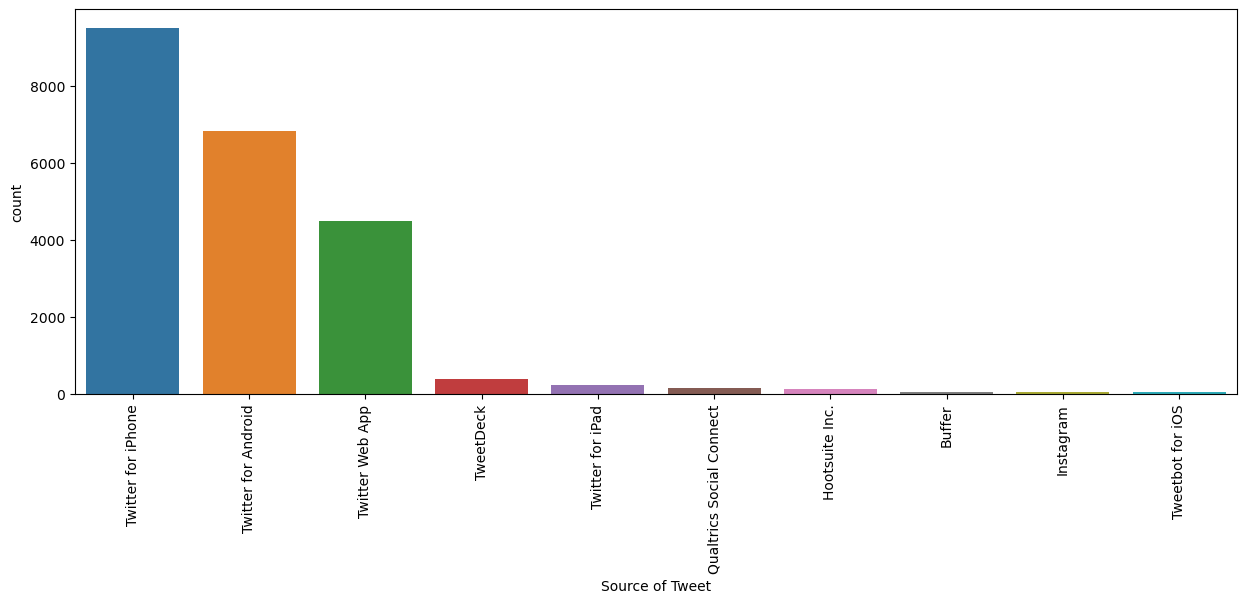

In [15]:
plt.figure(figsize = (15,5));
sns.countplot(data = df , x = "Source of Tweet" ,
              order = df['Source of Tweet'].value_counts(ascending = False).iloc[:10].index);
plt.xticks(rotation = 90);


<AxesSubplot:>

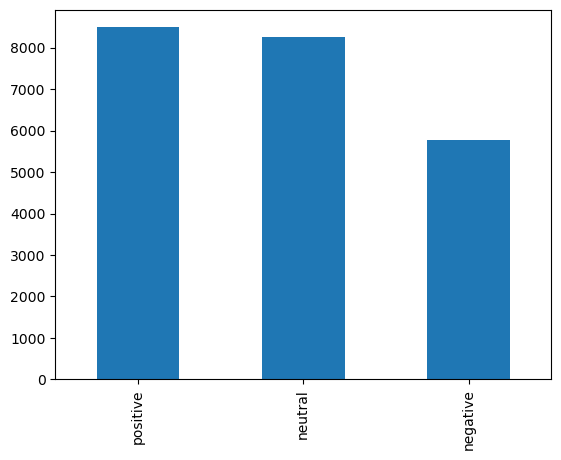

In [16]:
sent = df['Sentiment'].value_counts()
sent.plot(kind = "bar")

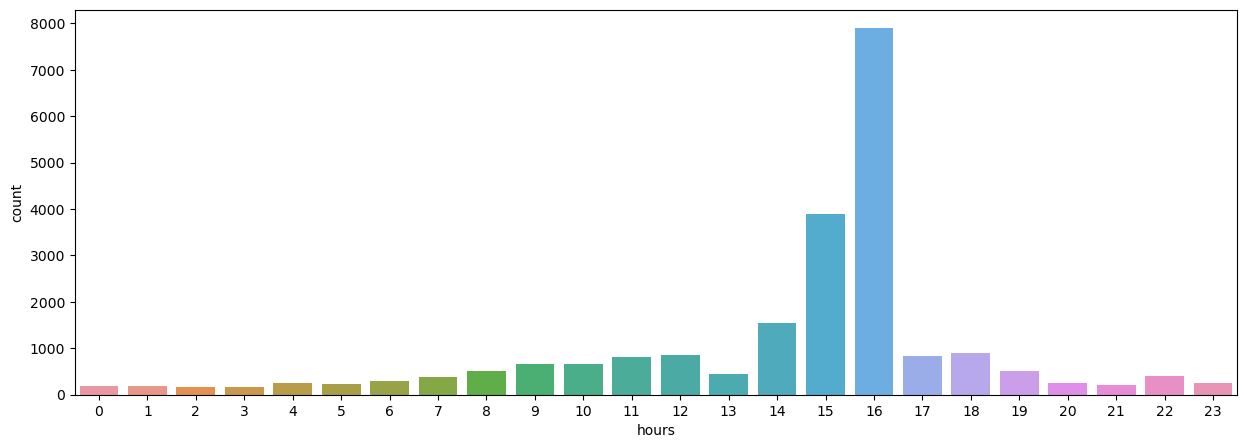

In [17]:
plt.figure(figsize = (15,5));
sns.countplot(data = df , x = "hours");

## Word Freq and WordCloud

In [18]:
#Load stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

#gather all the text
txt = ' '.join(df_text['cleaned_tweets'])

#Tokenize abstracts
tokens = word_tokenize(txt)

#Removing stopwords
txt_clean = [word for word in tokens if word not in stopwords]

In [19]:
word_freq = df.cleaned_tweets.str.split().explode().value_counts().reset_index()
word_freq.columns = ["Word", "Frequency"]
word_freq['Frequency'] = word_freq.Frequency.astype(int)

word_freq

,Word,Frequency
0,the,18820
1,to,7645
2,world,5971
3,of,5921
4,in,5746
...,...,...
39529,offsideit's,1
39530,offsidenowhere,1
39531,they…,1
39532,lollll,1


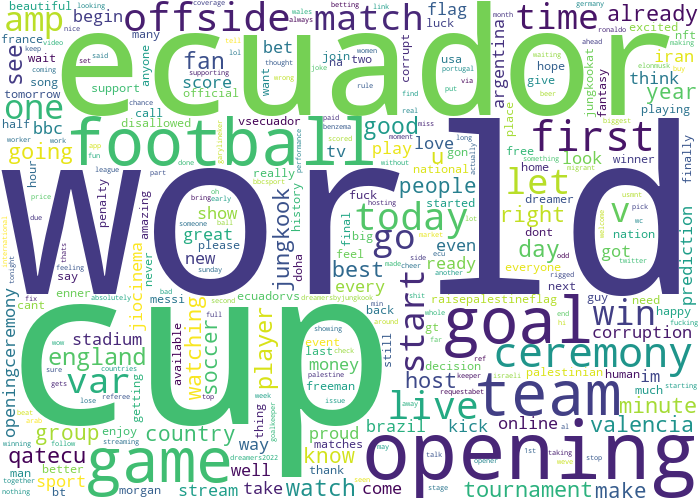

In [20]:
#Generate the text
text = ' '.join(txt_clean)

#Create a WordCloud objet
wordcloud = WordCloud(background_color="white",max_words=300,contour_width=3,contour_color='steelblue',width=700, height=500,
                     scale=1,max_font_size=500,
                     collocations=False)

wordcloud.generate(text)

wordcloud.to_image()

## Times Series Sentiment Trends

In [21]:
# Assuming you have a DataFrame named 'df' with a datetime column 'timestamp'
datetime_min = df['Date Created'].min()
datetime_max = df['Date Created'].max()

print("Minimum Datetime:", datetime_min)
print("Maximum Datetime:", datetime_max)

Minimum Datetime: 2022-11-20 00:00:00+00:00
Maximum Datetime: 2022-11-20 23:59:21+00:00


<Figure size 1400x600 with 0 Axes>

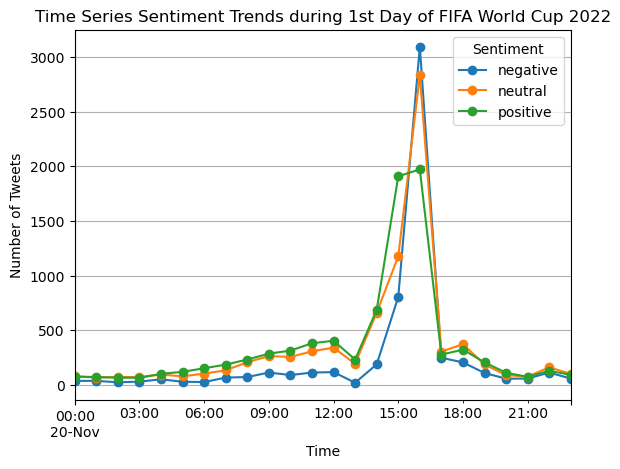

In [22]:
# Resample and count sentiment labels within time intervals
time_interval = 'H'
aggregated_df = df.groupby([pd.Grouper(key='Date Created', freq=time_interval), 'Sentiment']).size().unstack()

# Plot time series sentiment trends
plt.figure(figsize=(14, 6))
aggregated_df.plot(kind='line', marker='o')
plt.title('Time Series Sentiment Trends during 1st Day of FIFA World Cup 2022')
plt.xlabel('Time')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.grid()
plt.show();

# Modeling

## Naive Bayes

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X = df['cleaned_tweets']
y = df['Sentiment']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_vectorized = vectorizer.transform(X_test)

In [26]:
# Naive Bayes classifier train
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [27]:
# Make predictions
y_pred = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6847946725860156
Classification Report:
               precision    recall  f1-score   support

    negative       0.61      0.81      0.70      1149
     neutral       0.69      0.53      0.60      1648
    positive       0.74      0.75      0.74      1708

    accuracy                           0.68      4505
   macro avg       0.68      0.70      0.68      4505
weighted avg       0.69      0.68      0.68      4505



## Vader 

<b>VADER (Valence Aware Dictionary and sEntiment Reasoner)</b> is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, like tweets and other short texts.

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [34]:
# Function to analyze sentiment and return sentiment label
def get_sentiment_label(text):
    sentiment_scores = sia.polarity_scores(text)
    
    if sentiment_scores['compound'] > 0.05:
        return "Positive"
    elif sentiment_scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the sentiment analysis function to the 'text' column
df['vader_sentiment'] = df['cleaned_tweets'].apply(get_sentiment_label)

In [35]:
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,cleaned_tweets,hours,vader_sentiment
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022 https://t.co/oga3tzvg5h,Neutral,what are we drinking today tucantribe madbears_ lkinc_algo al_goanna,23,Neutral
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing @canadasocceren #worldcup2022 launch video. shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986. can’t wait to see these boys in action!\n\nthis is canada: fifa world cup opening video https://t.co/7g73vvwtg8,Positive,amazing canadasocceren launch video shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986 can’t wait to see these boys in actionthis is canada: world cup opening video,23,Positive
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading while watching #worldcup2022 https://t.co/1sqrna2dyu,Positive,worth reading while watching,23,Positive
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright\n\nhttps://t.co/4ayzbzgtx4\n#jeonjungkook #jungkook #전정국 #정국 #jk #goldenmaknae #bunny #kookie #jungshook #bts #방탄소년단 #worldcup2022 #fifakook \n@bts_twt,Positive,golden maknae shinning brightjeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 kook bts_twt,23,Positive
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the #worldcup2022 opening ceremony?? https://t.co/f72p03zn2k",Negative,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the opening ceremony??",23,Neutral


In [36]:
df['Sentiment'] = df.Sentiment.str.title()

# Calculate the accuracy
correct_predictions = (df['vader_sentiment'] == df['Sentiment']).sum()
total_predictions = len(df)
accuracy = correct_predictions / total_predictions * 100

print("Accuracy: {:.2f}%".format(accuracy))

Accuracy: 58.37%


# Xgboost

In [38]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Convert sentiment labels to numerical values
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df['Sentiment_Num'] = df['Sentiment'].map(sentiment_mapping)

df.head(5)

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,cleaned_tweets,hours,vader_sentiment,Sentiment_Num
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,what are we drinking today @tucantribe \n@madbears_ \n@lkinc_algo \n@al_goanna \n\n#worldcup2022 https://t.co/oga3tzvg5h,Neutral,what are we drinking today tucantribe madbears_ lkinc_algo al_goanna,23,Neutral,1
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,amazing @canadasocceren #worldcup2022 launch video. shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986. can’t wait to see these boys in action!\n\nthis is canada: fifa world cup opening video https://t.co/7g73vvwtg8,Positive,amazing canadasocceren launch video shows how much the face of canada and our men’s national team have changed since our last world cup entry in 1986 can’t wait to see these boys in actionthis is canada: world cup opening video,23,Positive,2
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,worth reading while watching #worldcup2022 https://t.co/1sqrna2dyu,Positive,worth reading while watching,23,Positive,2
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,golden maknae shinning bright\n\nhttps://t.co/4ayzbzgtx4\n#jeonjungkook #jungkook #전정국 #정국 #jk #goldenmaknae #bunny #kookie #jungshook #bts #방탄소년단 #worldcup2022 #fifakook \n@bts_twt,Positive,golden maknae shinning brightjeonjungkook jungkook 전정국 정국 jk goldenmaknae bunny kookie jungshook bts 방탄소년단 kook bts_twt,23,Positive,2
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the #worldcup2022 opening ceremony?? https://t.co/f72p03zn2k",Negative,"if the bbc cares so much about human rights, homosexual rights, and women rights then why not say these before the opening ceremony?? why are they saying these during the opening ceremony?? why did the bbc censor the opening ceremony??",23,Neutral,0


In [40]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)  # 3 classes: Positive, Neutral, Negative
xgb_classifier.fit(X_train_vec, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6943396226415094


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"

X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sentiment_Num'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer() 
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

y_pred = rf_classifier.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6925638179800222
